In [1]:
import pandas as pd
import numpy as np                                                   
import matplotlib.pyplot as plt
import seaborn as sns         
import statistics as stat 
import scipy.stats as stats       
from statsmodels.stats.weightstats import ztest 
from scipy.stats import ttest_ind                 
from scipy.stats import chi2_contingency            
from scipy.stats import f_oneway                
from scipy.stats import pearsonr, spearmanr     
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression   
import warnings
warnings.filterwarnings('ignore')                

In [2]:
data = pd.read_csv(r"C:\Users\User\OneDrive\archive (32)\StudentsPerformance.csv")

In [3]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
data.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
791,female,group D,some college,free/reduced,none,60,66,70
75,male,group B,associate's degree,free/reduced,none,44,41,38
98,female,group D,some college,free/reduced,none,58,67,62
646,female,group D,associate's degree,standard,none,59,70,65
767,male,group B,high school,standard,completed,76,62,60


In [6]:
data.shape

(1000, 8)

In [7]:
data.size

8000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Data Description

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


# Checking Data Type

In [12]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

 # unique values


In [14]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("-"*50)
    print("\n")

gender
['female' 'male']
--------------------------------------------------


race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------


parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------


lunch
['standard' 'free/reduced']
--------------------------------------------------


test preparation course
['none' 'completed']
--------------------------------------------------


math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
--------------------------------------------------


reading score
[ 72  90  95  57  

# DATA CLEANING AND PREPROCESSING

* Assigning Categorical and Numerical Features

In [18]:
cat_cols = data.select_dtypes(include = ['object']).columns


In [19]:
cat_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [20]:
num_cols = data.select_dtypes(include = [np.number]).columns

In [21]:
num_cols

Index(['math score', 'reading score', 'writing score'], dtype='object')

# DATA DISTRIBUTION

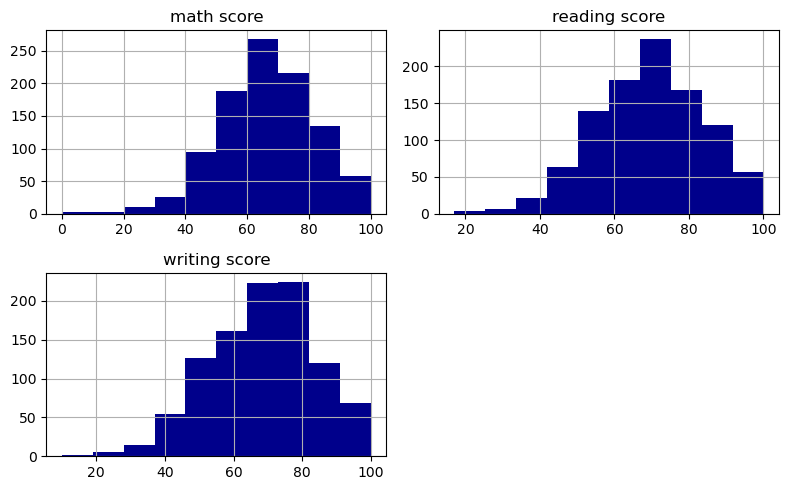

In [23]:
data[num_cols].hist(figsize=(8,5), color='darkblue')

plt.tight_layout()
plt.show()

# Missing Value Detection

In [25]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Checking Duplicates¶

In [27]:
data.duplicated().sum()

0

# EDA - Exploratory Data Analysis

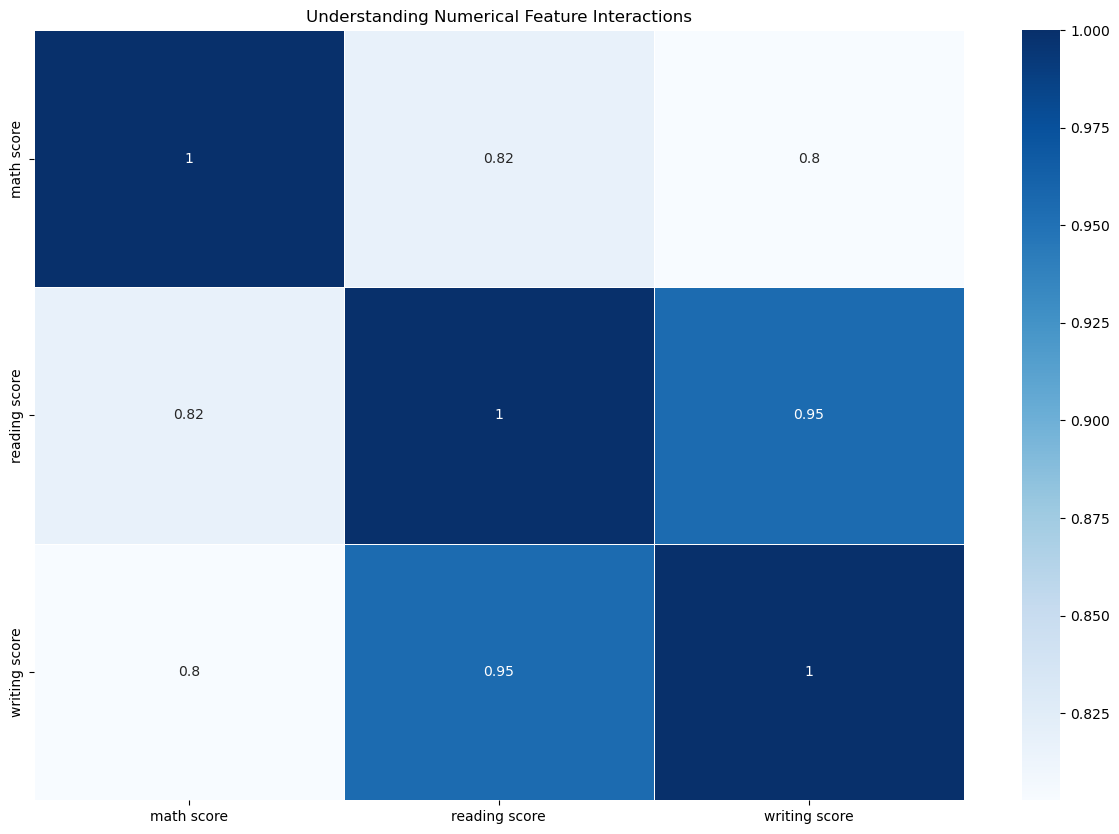

In [29]:
plt.figure(figsize=(15,10))

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5)

plt.title("Understanding Numerical Feature Interactions")
plt.show()

# HYPOTHESIS TESTING Z- TEST

In [31]:
male_score=data[data["gender"]=="male"]["writing score"]
female_score=data[data["gender"]=="female"]["writing score"]
z_stat,p_val=ztest(male_score,female_score,value=0)

In [32]:
p_val

1.8729942174175452e-23

In [33]:
if p_val<0.05:
    print("null hypothesis rejected")

else:
    print("null hypothesis accepted")
    

null hypothesis rejected


# Visualization

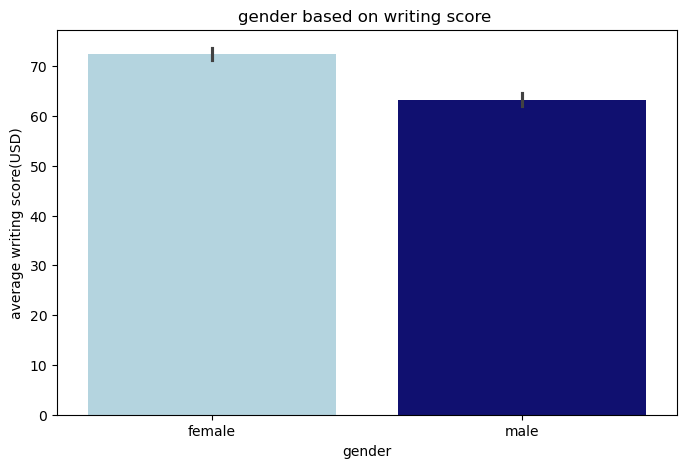

In [35]:
plt.figure(figsize=(8, 5))

sns.barplot(x='gender', y='writing score', data=data, palette=['#ADD8E6', 'navy'], estimator='mean')

plt.title("gender based on writing score ")
plt.xlabel("gender")
plt.ylabel("average writing score(USD)")

plt.show()

 * insight 


femail has more writing score

# HYPOTHESIS TESTING WITH T-TEST

In [39]:
# Separate the reading scores based on lunch type
group1 = data[data['lunch'] == 'standard']['reading score']
group2 = data[data['lunch'] == 'free/reduced']['reading score']

# Now perform the t-test
t_stat, p_val = ttest_ind(group1, group2)


In [40]:
p_val

2.0027966545279011e-13

In [41]:
if p_val < 0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")
    

null hypothesis rejected


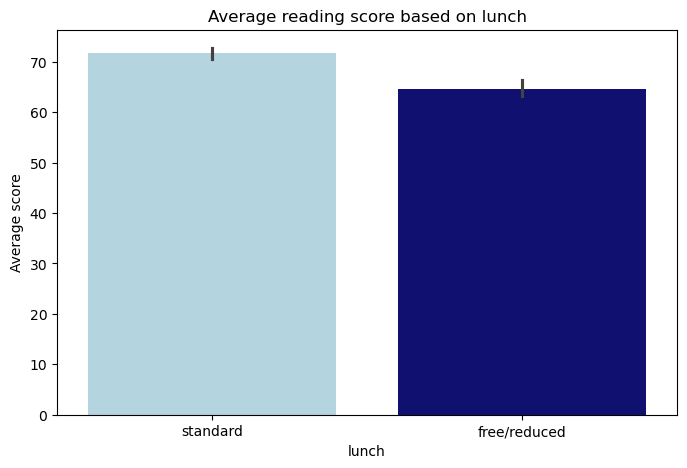

In [42]:
plt.figure(figsize=(8, 5))

sns.barplot(x='lunch', y='reading score', data=data, estimator='mean', palette=['#ADD8E6', 'navy'])

plt.title("Average reading score based on lunch")
plt.xlabel("lunch")
plt.ylabel("Average score")

plt.show()

# Hypothesis Testing with chi2 test

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [45]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [46]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    

In [47]:
categorical_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [48]:
cat_colums = ['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']


In [49]:
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['writing score'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")
    
    # Decision based on p-value
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and charges.")
    else:
        print(f"There is no statistically significant association between {col} and charges.")
    print("\n")

Chi2 Statistic: 163.75075682701225
P-value: 2.2064991861989455e-08
Degrees of Freedom: 76
Contingency Table:
writing score  10   15   19   22   23   27   28   30   32   33   ...  91   \
gender                                                           ...        
female           1    0    0    0    1    1    1    1    2    2  ...    8   
male             0    1    1    1    0    2    0    0    0    0  ...    3   

writing score  92   93   94   95   96   97   98   99   100  
gender                                                      
female           6    7    6    7    4    2    2    3   13  
male             3    1    0    1    0    0    0    1    1  

[2 rows x 77 columns]


There is a statistically significant association between gender and charges.


Chi2 Statistic: 348.6833152856886
P-value: 0.03945902069397243
Degrees of Freedom: 304
Contingency Table:
writing score   10   15   19   22   23   27   28   30   32   33   ...  91   \
race/ethnicity                                    

# visualization

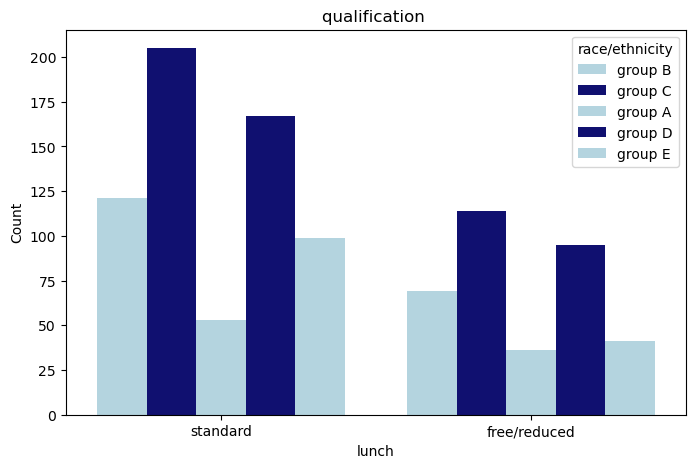

In [51]:
plt.figure(figsize=(8, 5))

sns.countplot(data=data, x='lunch', hue='race/ethnicity',palette=['#ADD8E6', 'navy'] )

plt.title('qualification ')
plt.xlabel('lunch')
plt.ylabel('Count')

plt.show()

# ANOVA (Analysis of Variance) - Test

In [53]:
lunch_by_math_score = [group['lunch'].values for name, group in data.groupby('math score')]

In [54]:
# Group math scores by lunch
grouped_math = data.groupby('lunch')['math score'].apply(list)

# Perform ANOVA
math_anova = f_oneway(*grouped_math)

# Print result
print("ANOVA Result for Math Score by Lunch:")
print(math_anova)

ANOVA Result for Math Score by Lunch:
F_onewayResult(statistic=140.1188415483512, pvalue=2.4131955993147374e-30)


In [55]:
if p_val < 0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")
    

null hypothesis rejected


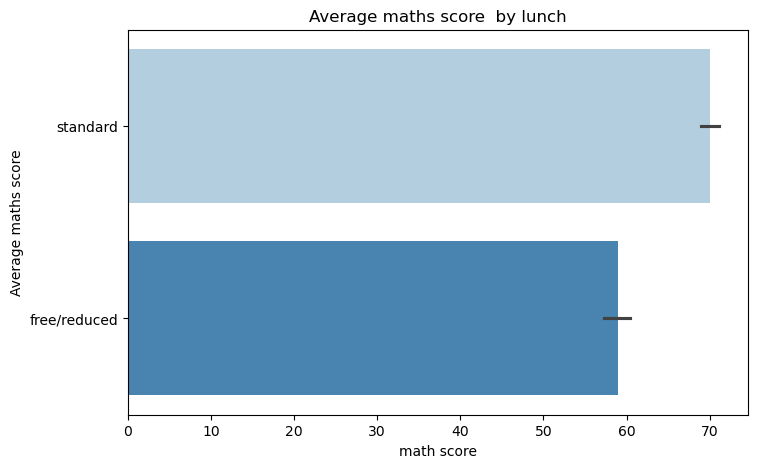

In [56]:
plt.figure(figsize=(8, 5))

sns.barplot(x='math score', y='lunch', data=data, estimator='mean', palette='Blues')

plt.title('Average maths score  by lunch')
plt.xlabel('math score')
plt.ylabel('Average maths score')

plt.show()

#  Binomial Test

In [58]:
from scipy.stats import binomtest



# Define passing as score ≥ 50
data['pass_math'] = data['math score'] >= 50

# Count passes and total
num_passes = data['pass_math'].sum()
total_students = len(data)

# Run Binomial Test
result = binomtest(k=num_passes, n=total_students, p=0.5, alternative='two-sided')

# Results
print(f"Passes: {num_passes}/{total_students}")
print("p-value:", result.pvalue)

# Interpretation
if result.pvalue < 0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")
    

Passes: 865/1000
p-value: 6.273045024472125e-131
null hypothesis rejected


# F - Test

# Encoding 

In [61]:
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [62]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math
0,0,1,1,1,1,72,72,74,True
1,0,2,4,1,0,69,90,88,True
2,0,1,3,1,1,90,95,93,True
3,1,0,0,0,1,47,57,44,False
4,1,2,4,1,1,76,78,75,True
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,True
996,1,2,2,0,1,62,55,55,True
997,0,2,2,0,0,59,71,65,True
998,0,3,4,1,0,68,78,77,True


# Scaling the Data

In [64]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.96462528, -1.01504393, -0.81264039, ...,  0.19399858,
         0.39149181,  0.39505615],
       [-0.96462528, -0.15044092,  0.82795259, ...,  1.42747598,
         1.31326868,  0.39505615],
       [-0.96462528, -1.01504393,  0.28108826, ...,  1.77010859,
         1.64247471,  0.39505615],
       ...,
       [-0.96462528, -0.15044092, -0.26577606, ...,  0.12547206,
        -0.20107904,  0.39505615],
       [-0.96462528,  0.71416208,  0.82795259, ...,  0.60515772,
         0.58901542,  0.39505615],
       [-0.96462528,  0.71416208,  0.82795259, ...,  1.15336989,
         1.18158627,  0.39505615]])

In [65]:
data = pd.DataFrame(data,columns = data.columns,index = data.index)

In [66]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math
0,0,1,1,1,1,72,72,74,True
1,0,2,4,1,0,69,90,88,True
2,0,1,3,1,1,90,95,93,True
3,1,0,0,0,1,47,57,44,False
4,1,2,4,1,1,76,78,75,True
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,True
996,1,2,2,0,1,62,55,55,True
997,0,2,2,0,0,59,71,65,True
998,0,3,4,1,0,68,78,77,True


In [67]:
X = data.drop('pass_math', axis=1)
Y = data['pass_math']

# train -test-split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Building Model

In [71]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# predicting

In [73]:
Y_pred = model.predict(X_test)

In [74]:
Y_pred

array([ 1.20255704,  0.72623251,  1.07100288,  0.95615966,  1.0889342 ,
        1.06616439,  0.88486805,  0.73984615,  1.13004938,  0.64680489,
        0.62748793,  0.35613104,  0.88523107,  0.58476547,  1.16539662,
        0.88312979,  0.6593838 ,  0.67790113,  0.60506587,  0.68551838,
        1.06021883,  0.54682497,  0.5658662 ,  0.39309519,  1.03429774,
        1.09186089,  0.92823722,  0.50741555,  0.40743112,  0.60867663,
        0.84647287,  0.98845859,  0.79180472,  1.01145277,  1.07807306,
        0.5850412 ,  0.97636984,  0.9122838 ,  0.95707246, -0.0839735 ,
        1.12902969,  0.88584596,  0.93698643,  0.78030479,  1.10831817,
        0.82047139,  0.94890859,  0.37902625,  1.16665402,  1.02283108,
        0.96733717,  0.84251142,  1.07717653,  0.62254235,  0.9217173 ,
        0.90797405,  1.20978229,  0.78674842,  1.14475752,  1.18166268,
        0.66821021,  0.93192971,  1.09023605,  0.77216503,  1.10514186,
        0.88319533,  0.67792932,  0.75761288,  0.76756255,  1.06

# F - Statistics

In [76]:
n = len(Y_test)  
p = X_train.shape[1]

In [77]:
n

300

In [78]:
p


8

In [79]:
RSS = np.sum((Y_test - Y_pred) ** 2)

In [80]:
RSS

22.49051986927781

In [81]:
TSS = np.sum((Y_test - np.mean(Y_test)) ** 2)

In [82]:
TSS

42.33

In [83]:
ESS = TSS - RSS

In [84]:
ESS

19.839480130722187

In [85]:
MSE = RSS / (n - p - 1)

In [86]:
MSE

0.0772870098600612

In [87]:
MSR = ESS / p

In [88]:
MSR

2.4799350163402734

In [89]:
F_statistic = MSR / MSE

In [90]:
p_value = 1 - stats.f.cdf(F_statistic, p, n - p - 1)

In [91]:
print('F-statistic:', F_statistic)
print('p-value:', p_value)

F-statistic: 32.08734586614928
p-value: 1.1102230246251565e-16


In [92]:
if result.pvalue < 0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")
    

null hypothesis rejected


# conclusion

* Female students showed higher writing scores compared to males.

* Students with standard lunch and higher parental education levels performed better.

* Hypothesis tests confirmed statistically significant differences across several groups.

* Machine learning models effectively predicted student performance from cleaned data.

* The project demonstrates the power of combining statistics and ML in educational analysis.

* Findings can support data-driven decisions in educational policy and interventions.